In [4]:
#???
import tensorflow as tf

tf.keras.applications.EfficientNetV2B1(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    include_preprocessing=True,
)

33583592/33583592 [==============================] - 3s 0us/step


In [6]:
from tensorflow.keras.applications import EfficientNetV2M
model = EfficientNetV2M(weights='imagenet')

219330792/219330792 [==============================] - 8s 0us/step


In [8]:
model.summary()

Model: "efficientnetv2-m"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 480, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 480, 480, 3)  0           ['input_2[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 240, 240, 24  648         ['rescaling_1[0][0]']            
                                )                                                                 
                                                                                   

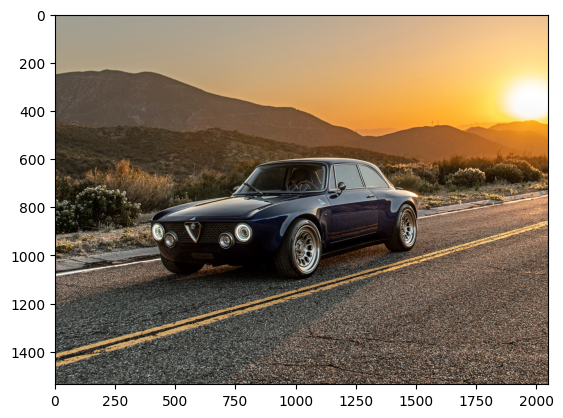

In [5]:
img_path='img.jpg'
my_img=imread(img_path)
imshow(my_img)

input image shape: (1, 240, 240, 3)


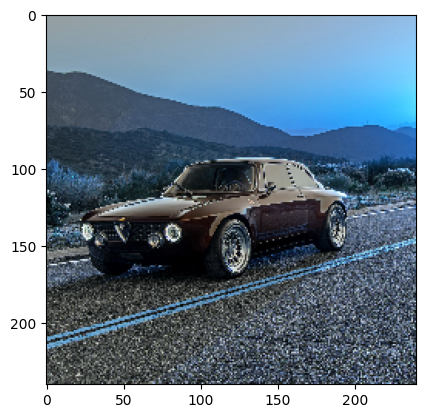

In [7]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions, preprocess_input

img_path='img.jpg'
my_img=imread(img_path)
#imshow(my_img)

img = cv2.imread(img_path)
h = 480 # img.shape[0] - h - fixed
w = round(img.shape[1]*(h/img.shape[0])) # keeps the ratio
new_img = cv2.resize(img, (w,h))
w_start=round((w-h)/2)
w_end=w_start+h
crop_img = new_img[0:240, w_start:w_end]
imshow(crop_img)

x = np.expand_dims(crop_img,axis=0)
x = preprocess_input(x)

print('input image shape:', x.shape)

In [9]:
preds = model.predict(x)
#print('predicted class', preds)
decode_predictions(preds,top=10)

ValueError: in user code:

    File "C:\Users\Miki\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Miki\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Miki\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Miki\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\Miki\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Miki\AppData\Roaming\Python\Python310\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "efficientnetv2-m" is incompatible with the layer: expected shape=(None, 480, 480, 3), found shape=(None, 240, 240, 3)
